First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies       

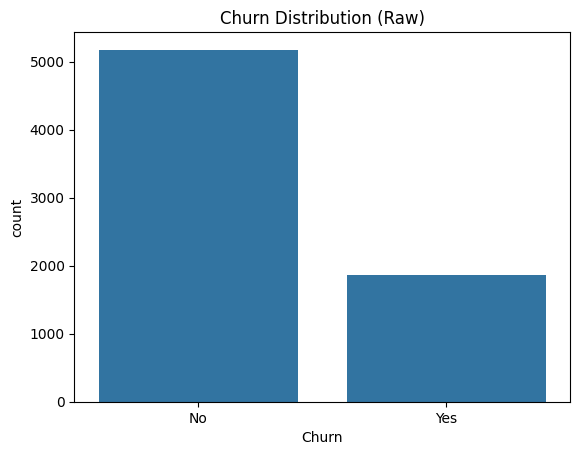


Missing TotalCharges: 11

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Final Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                 

C:\Users\arjun\AppData\Local\Temp\ipykernel_10948\345938056.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


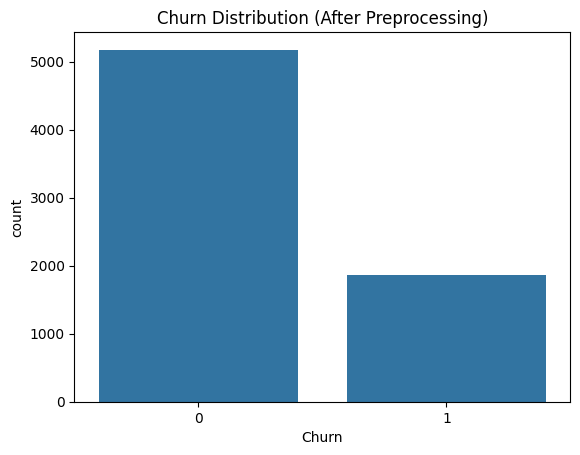

In [2]:
# 📦 Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# 📂 Load Dataset (adjust path if needed)
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")  # Ensure this file is in the same folder as your notebook

# 🔍 Basic Overview
print("First 5 rows:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

# 📊 Target variable distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution (Raw)")
plt.show()

# 🧹 Data Cleaning & Preprocessing

## 1. Drop customerID column
df.drop('customerID', axis=1, inplace=True)

## 2. Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check and fill missing TotalCharges
print(f"\nMissing TotalCharges: {df['TotalCharges'].isnull().sum()}")
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

## 3. Convert Churn to binary (0 = No, 1 = Yes)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

## 4. One-Hot Encode categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns to encode:", cat_cols)

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

## 5. Scale numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# ✅ Final Check
print("\nFinal Data Info:")
print(df.info())

print("\nFinal Data Shape:", df.shape)

# 📊 Churn distribution after preprocessing
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution (After Preprocessing)")
plt.show()

df.to_csv('../data/cleaned_churn.csv', index=False)
